In [1]:
import shutil
import sys
from provided_code.data_loader import DataLoader #provided by the challenge creators
from provided_code.general_functions import get_paths #provided by the challenge creators
import os

In [2]:
### Get training data directory paths ###

# set to primary directory of project!
primary_directory = os.getcwd()
sys.path.insert(0, primary_directory)
main_data_dir = '{}/provided-data'.format(primary_directory)
training_data_dir = '{}/train-pats'.format(main_data_dir)
training_plan_paths = get_paths(training_data_dir, ext='')

In [3]:
### Custom function to visaulize data ###
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import Axes3D
import scipy.ndimage
from skimage import measure
import matplotlib.pyplot as plt

# Uses marching_cubes_lewiner algorithm
# to draw ct scan and masks
def plot_3d(image, threshold=400):
    # Position the scan upright
    p = image.transpose(1,0,2)
    p = p[:,:,::-1]
    
    verts, faces, norm, val = measure.marching_cubes_lewiner(p, threshold)    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.1)
    face_color = [0.5, 0.5, 1]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)
    colors=['tab:blue','tab:orange','tab:green','tab:red','tab:purple',
            'tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']
    for i in range(7):
        if a['structure_masks'][:,:,:,i].sum():
            p2 = a['structure_masks'][:,:,:,i].transpose(1,0,2)
            p2 = p2[:,:,::-1]
            v,f,n,va = measure.marching_cubes_lewiner(p2,0)
            mesh2 = Poly3DCollection(v[f], alpha=0.1)
            mesh2.set_facecolor(colors[i])    
            ax.add_collection3d(mesh2)
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

    plt.show()

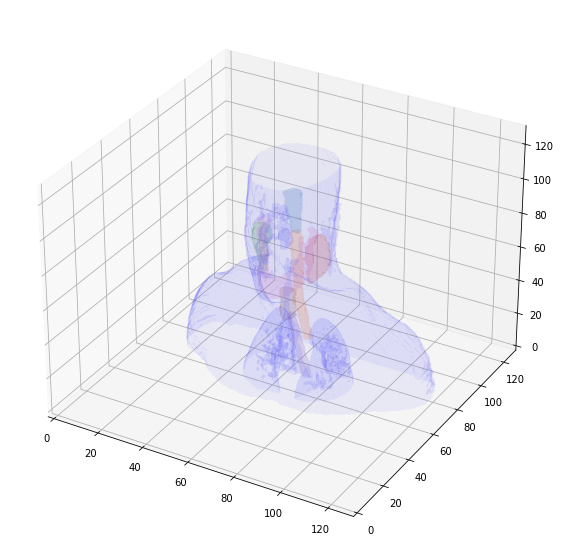

In [4]:
### Draw CT scan of arbitrary patient ###
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
data_loader_train = DataLoader(training_plan_paths)
a = data_loader_train.load_and_shape_data(training_plan_paths[2])
plot_3d(a['ct'][:,:,:,0])

In [5]:
### Draw ground turth dose of the same patient ###
from mayavi import mlab
dose = a['dose'][:,:,:,0].transpose(1,0,2)
dose = dose[:,:,::-1]
ct = a['ct'][:,:,:,0].transpose(1,0,2)
ct = ct[:,:,::-1]
mlab.pipeline.volume(mlab.pipeline.scalar_field(ct))
mlab.pipeline.volume(mlab.pipeline.scalar_field(dose))
mlab.show()